In [36]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import mne

In [19]:
def plot_channels(data, time, channels, limit = None):
    figure, axes = plt.subplots(nrows = len(channels), figsize = (20, 0.75 * len(channels)))
    plt.subplots_adjust(
        left = 0.1,
        bottom = 0.1,
        right = 0.9,
        top = 0.9,
        wspace = 0,
        hspace = 0
    )

    x = time

    for i, channel in enumerate(channels):
        y = data[:, i]
        axes[i].plot(x, y, linewidth = 0.5, color = 'black')

        if limit is not None:
            axes[i].set_ylim(-limit, limit)

        axes[i].set_xlim(0, 10)
        axes[i].get_xaxis().set_ticks([])
        axes[i].get_yaxis().set_ticks([])
        axes[i].set_ylabel(channel, rotation = 0, labelpad = 60, loc = 'center')

        if i != 0:
            axes[i].spines['top'].set_visible(False)

        if i != len(channels) - 1:
            axes[i].spines['bottom'].set_visible(False)

    plt.show()

In [20]:
with open('raw/W1_C1_Vm_rest.txt', 'r') as file:
    data = np.array(list(csv.reader(file, delimiter = '\t')))

In [21]:
channels = list(data[ 0, : ])
data = data[ 1:, : ].transpose()
sfreq = 20000.0  # Hz

ch_types = [ 'bio' for i in range(0, len(channels)) ]

info = mne.create_info(ch_names = channels, sfreq = sfreq, ch_types = ch_types)
raw = mne.io.RawArray(data, info)

channels = raw.ch_names
sfreq = raw.info['sfreq']

Creating RawArray with float64 data, n_channels=30, n_times=200001
    Range : 0 ... 200000 =      0.000 ...    10.000 secs
Ready.


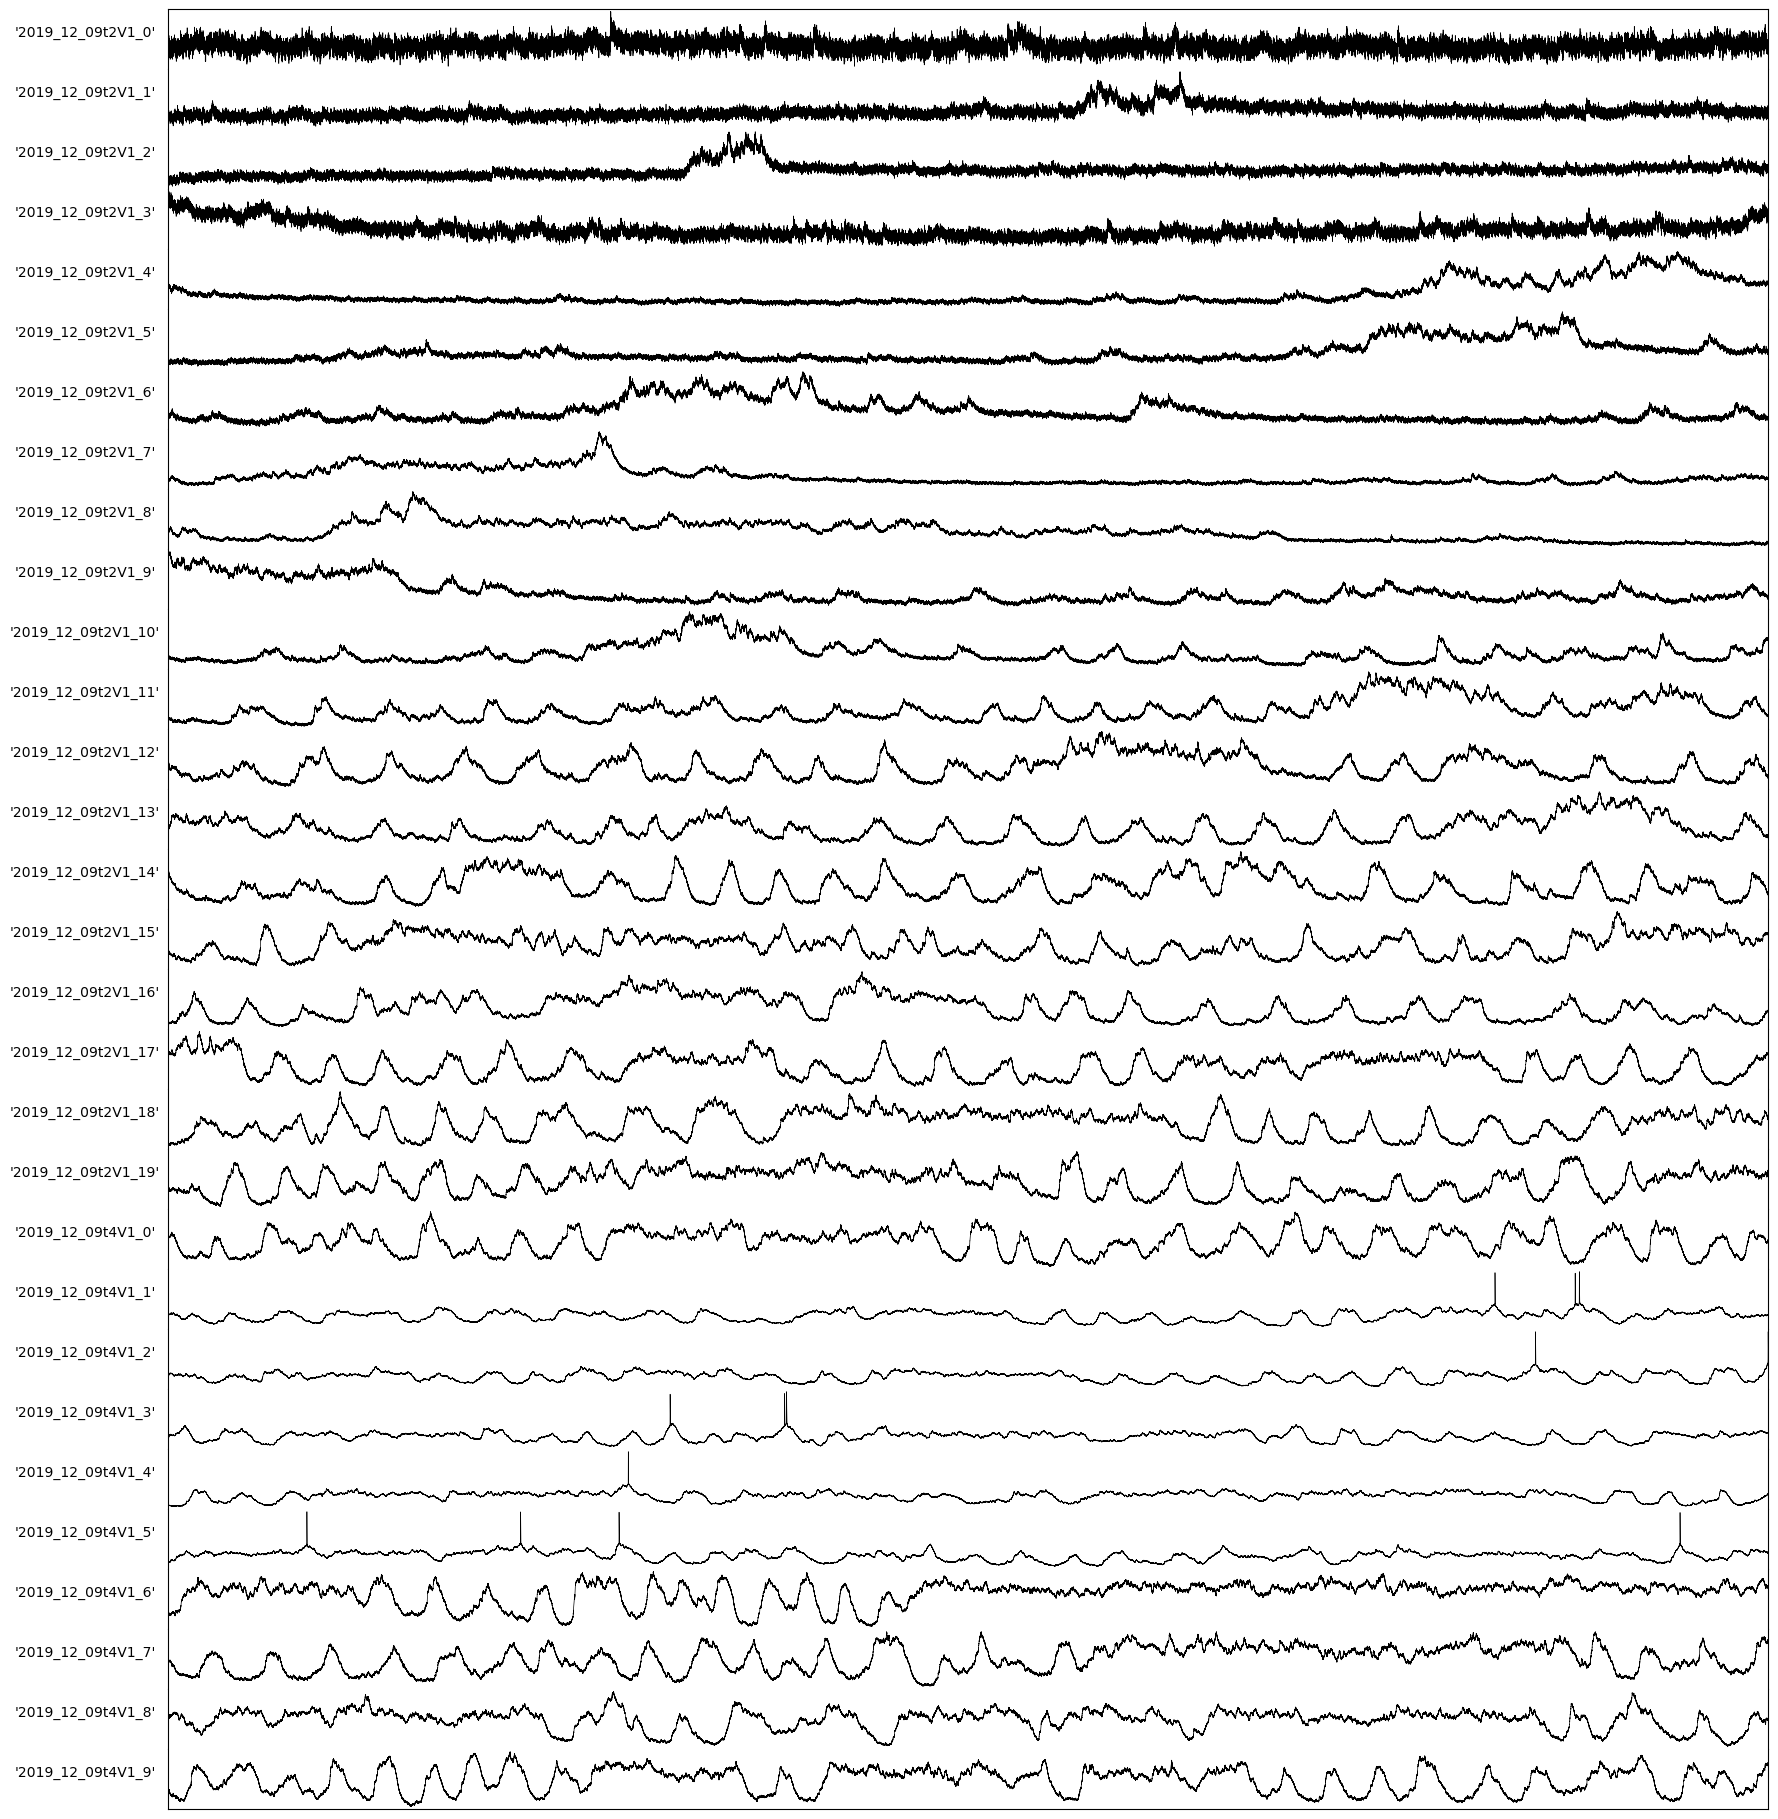

In [22]:
plot_channels(data = raw.get_data().T, time = raw.times, channels = channels, limit = None)

Effective window size : 0.102 (s)


/var/folders/qt/hgl1dlf168d7h94jf7mz7b3c0000gn/T/ipykernel_69478/2551549957.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(picks = 'bio').plot(picks = 'bio')
/Users/ieva/miniconda3/envs/mne/lib/python3.11/site-packages/mne/viz/utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


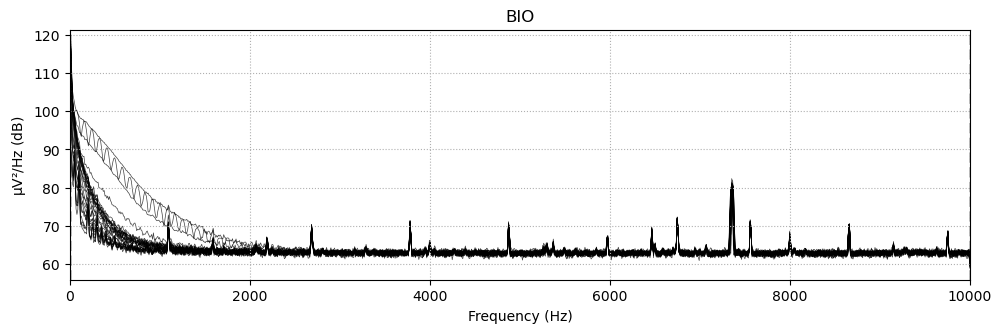

In [23]:
raw.compute_psd(picks = 'bio').plot(picks = 'bio')
plt.show()

In [27]:
raw.filter(l_freq = 5, h_freq = None, fir_design = 'firwin', picks = 'bio')

No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Filter length: 33001 samples (1.650 s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


<RawArray | 30 x 200001 (10.0 s), ~45.8 MB, data loaded>

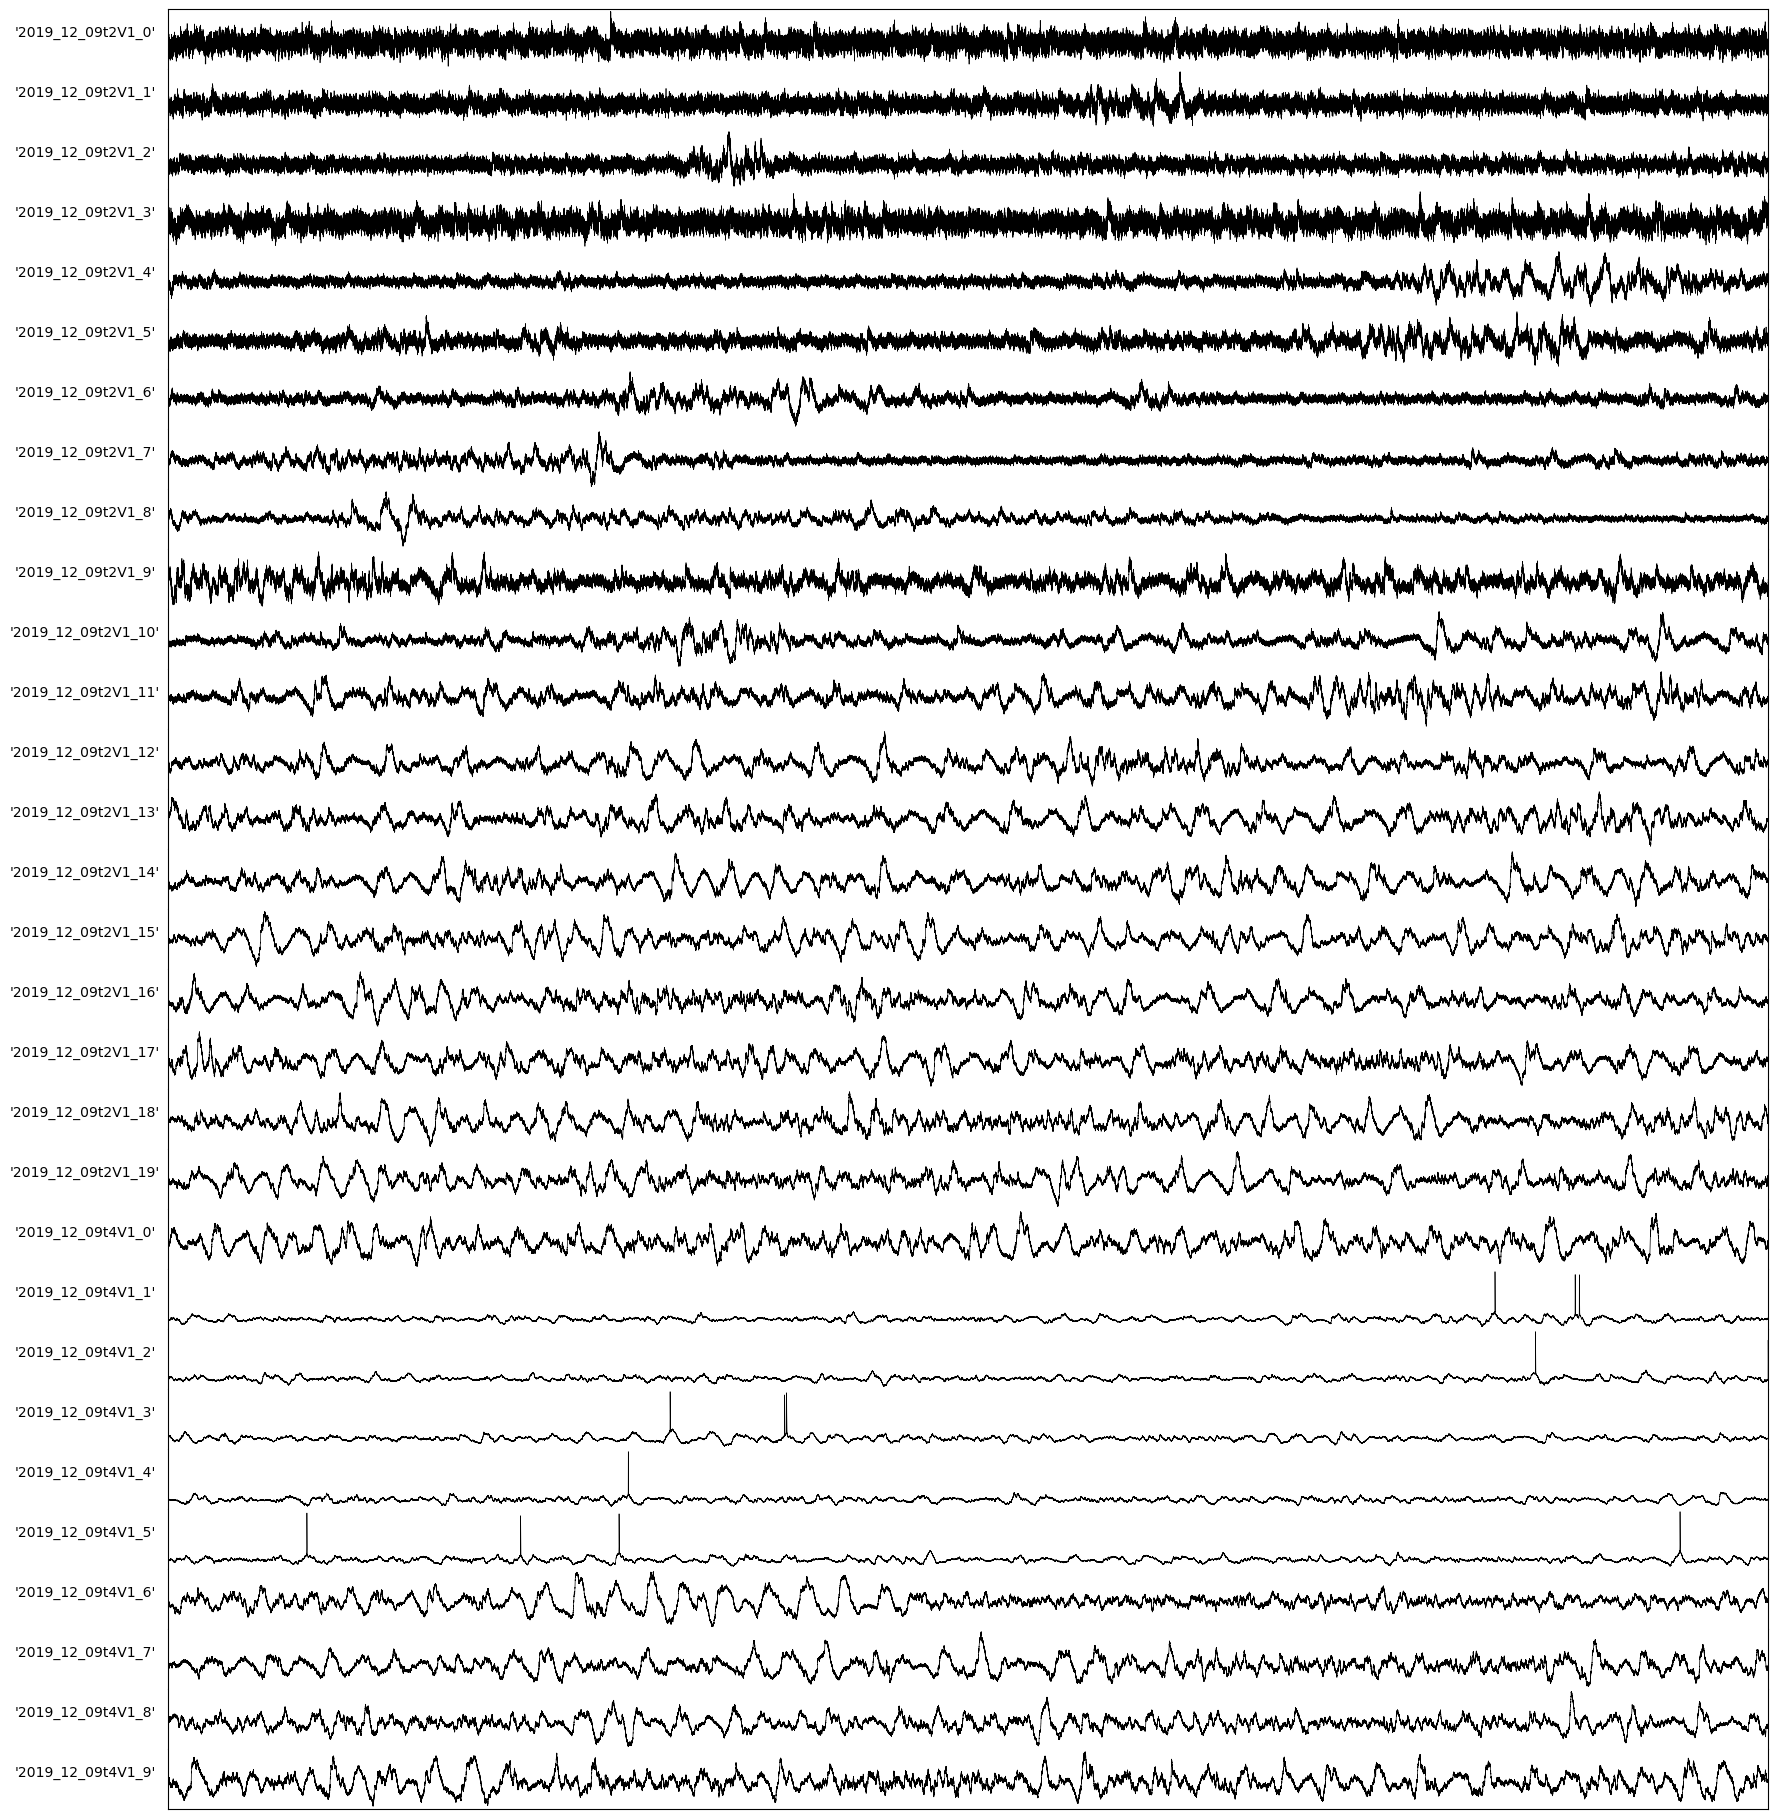

In [107]:
plot_channels(data = raw.get_data().T, time = raw.times, channels = channels)